## Project : Predicting Customer Happiness

#### Import the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#### Read the Dataset

In [2]:
data = pd.read_csv('ACME-HappinessSurvey2020.csv')

#### Data Description:

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers

X1 = my order was delivered on time

X2 = contents of my order was as I expected

X3 = I ordered everything I wanted to order

X4 = I paid a good price for my order

X5 = I am satisfied with my courier

X6 = the app makes ordering easy for me

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer. 

### Initial Data Inspection

In [3]:
# Check data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [4]:
# first few rows of the dataset
data.head()

,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [5]:
# Summary statistics
data.describe()

,Y,X1,X2,X3,X4,X5,X6
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Ensure that there are no null values in the dataset

In [6]:
# Provide NaN count for each feature in the dataset
print(data.isnull().sum())

Y     0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
dtype: int64


The dataset contains 6 features with 126 records. All 6 features have ordinal values. There are no null values in the dataset.

### EDA and Visualizations

#### Bar Chart

The bar chart reveals that there are slightly more happy customers (1) than unhappy ones (0) in the dataset. 

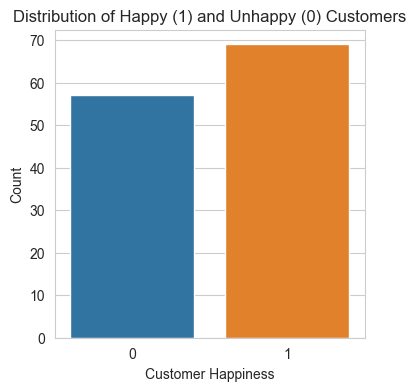

In [7]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Bar chart of the target attribute (Y)
plt.figure(figsize=(4, 4))
sns.countplot(x='Y', data=data)
plt.title("Distribution of Happy (1) and Unhappy (0) Customers")
plt.xlabel("Customer Happiness")
plt.ylabel("Count")
plt.show()

#### Correlation Matrix:

This heatmap is correlation of each column in the dataset, where closer to 1 indicates a strong positive correlation, and closer to -1 indicates a strong negative correlation.

- The correlation matrix shows that some attributes have a moderate positive correlation with customer happiness (Y). For instance, X1 (delivery time) seems to have a relatively stronger correlation with customer happiness compared to other attributes. This might be a significant factor in determining customer satisfaction.
- The correlations between the attributes are generally low, indicating relative independence of each other.

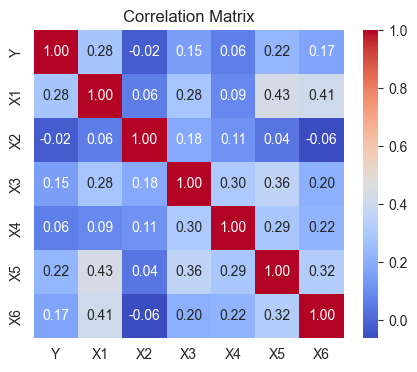

In [8]:
# Correlation matrix
plt.figure(figsize=(5, 4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#### Histograms for Each Attribute (X1 to X6):

These histograms display the distribution of responses for each question.

- The histograms for X1, X3, X4, X5, and X6 show that a majority of customers have given ratings of 3,4 or 5, indicating a general satisfaction in these areas.
- However, the distribution for X2 (contents of order as expected) is more spread out, with a significant number of customers giving lower ratings (1 and 2). This could indicate a potential area for improvement.

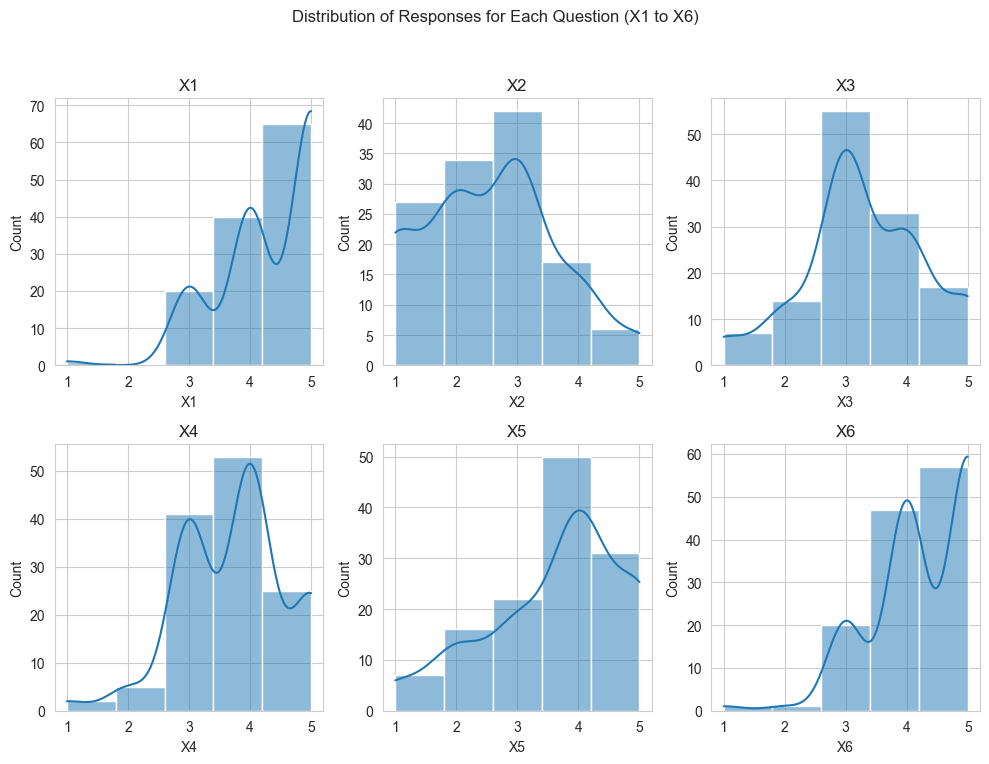

In [9]:
# Histograms for each attribute (X1 to X6)
fig, axs = plt.subplots(2, 3, figsize=(10, 8))
fig.suptitle('Distribution of Responses for Each Question (X1 to X6)')
questions = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6']
for i, ax in enumerate(axs.flatten()):
    sns.histplot(data[questions[i]], bins=5, ax=ax, kde=True)
    ax.set_title(questions[i])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Visualizing the Distribution of Features by each class:

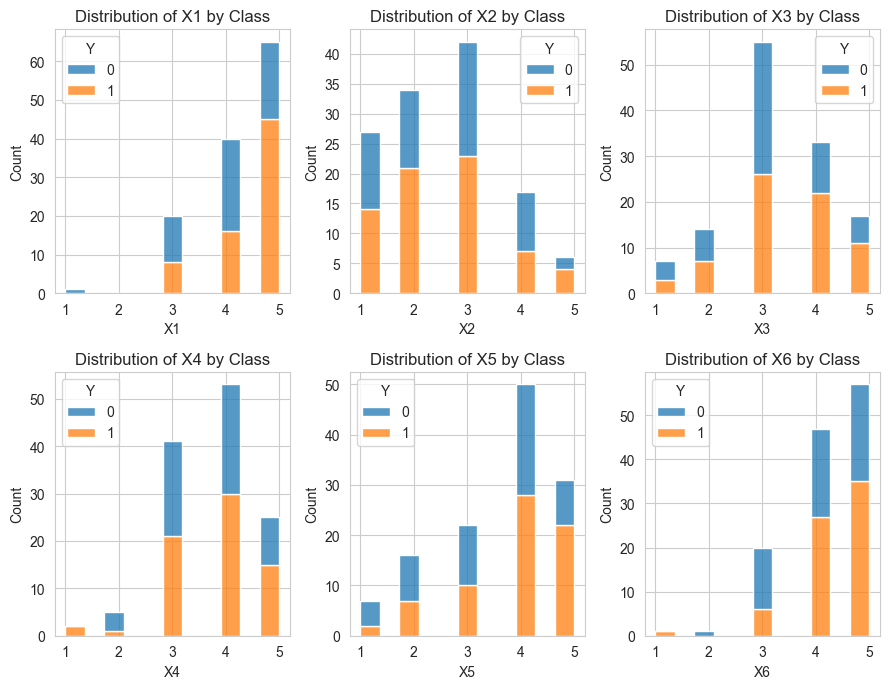

In [10]:
fig, axes = plt.subplots(2, 3, figsize=(9, 7))
axes = axes.flatten()

# Plotting distributions for each feature X1-X6
for i, ax in enumerate(axes):
    sns.histplot(data, x=f'X{i+1}', hue='Y', multiple="stack", ax=ax)
    ax.set_title(f'Distribution of X{i+1} by Class')
    ax.set_xlabel(f'X{i+1}')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

#### Box Plot

- The box plots indicate that the responses for most questions are concentrated around the higher ratings (4 and 5), especially for X1, X4, X5, and X6.
- There are few outliers in the data, particularly for X5 (satisfaction with the courier), where some customers rated significantly low.

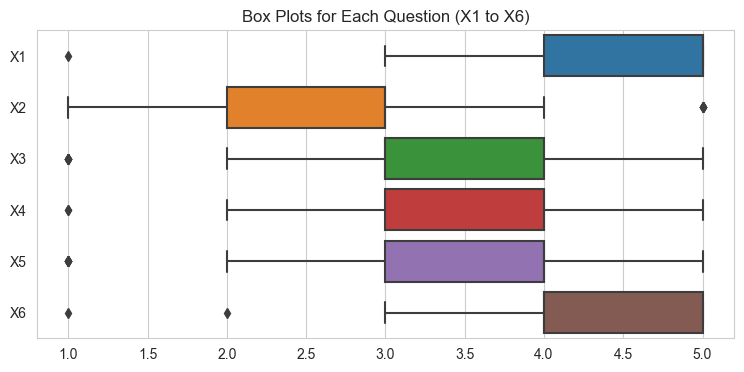

In [11]:
# Box plots for each attribute (X1 to X6)
plt.figure(figsize=(9, 4))
sns.boxplot(data=data.iloc[:, 1:], orient='h')
plt.title("Box Plots for Each Question (X1 to X6)")
plt.show()

### Data Preprocessing

In [12]:
# Preparing the data
X = data.drop('Y', axis=1)  # Predictor variables
y = data['Y']               # Target variable

# Splitting the data into training and testing sets with 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

Note: As all features have values from 1 to 5, i.e, as they have similar scales, Scaling is not done further.

### Feature Selection Test

In order to understand the most important features, ANOVA F-Test and RFE Ranking is done here.

In [13]:
# Apply Filter Method: Using ANOVA F-test
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# Apply Wrapper Method: Using RFE with Random Forest Classifier
rfe = RFE(estimator=RandomForestClassifier(random_state=45), n_features_to_select=3)
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Feature Scores from ANOVA F-test
filter_scores = fs.scores_

# Feature Ranking from RFE
rfe_ranking = rfe.ranking_

# Preparing DataFrame for display
features_df = pd.DataFrame({'Feature': X.columns, 'ANOVA F-test Score': filter_scores, 'RFE Ranking': rfe_ranking})

features_df.sort_values(by='ANOVA F-test Score', ascending=False)

,Feature,ANOVA F-test Score,RFE Ranking
0,X1,4.736442,2
4,X5,3.718994,1
5,X6,1.441011,4
2,X3,0.162470,1
1,X2,0.083873,1
3,X4,0.031491,3


Varied feature importances can be seen from the tests. In both tests, features X1 and X5 seem to be in the top 2 ranks. Further investigation of feature importance is done below in Machine Learning - Round 1.

## Machine Learning - Round 1 

All the features are used here for training. The models used here are Logistic Regression and Decision Trees. As this is for done for obtaining a basic idea of the feature importances, hyperparameter tuning is not performed in Round 1.

### I. Logistic Regression

In [14]:
# Creating and fitting the logistic regression model
logreg = LogisticRegression(random_state = 56)
logreg.fit(X_train, y_train)

# Predicting on the test set
y_pred = logreg.predict(X_test)

In [15]:
# Model evaluation
lr_class_report = classification_report(y_test, y_pred)

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[ 6,  6],
       [ 2, 12]], dtype=int64)

In [17]:
print("Classification Report:\n", lr_class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.50      0.60        12
           1       0.67      0.86      0.75        14

    accuracy                           0.69        26
   macro avg       0.71      0.68      0.68        26
weighted avg       0.71      0.69      0.68        26



##### Accuracy of Model = 69%

In [18]:
# Extracting the coefficients from the logistic regression model
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': logreg.coef_[0]})

# Sorting the coefficients by their absolute values for better interpretation
coefficients['Absolute Coefficient'] = coefficients['Coefficient'].abs()
sorted_coefficients = coefficients.sort_values(by='Absolute Coefficient', ascending=False)

sorted_coefficients

,Feature,Coefficient,Absolute Coefficient
0,X1,0.394104,0.394104
4,X5,0.286695,0.286695
3,X4,-0.170962,0.170962
5,X6,0.123988,0.123988
2,X3,-0.021562,0.021562
1,X2,-0.008918,0.008918


The model gave an accuracy of 69%. Furthermore, X1 feature (delivery time) seems to the prominent indicator.

### II. Decision Trees

In [19]:
# Initialize the Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=56)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

In [20]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.42      0.43        12
           1       0.53      0.57      0.55        14

    accuracy                           0.50        26
   macro avg       0.49      0.49      0.49        26
weighted avg       0.50      0.50      0.50        26



In [21]:
# Extracting feature importances
feature_importances = dt_classifier.feature_importances_

# Creating a DataFrame for visualization
features = X.columns
importances_df = pd.DataFrame({'Features': features, 'Importance': feature_importances})

# Sorting the DataFrame based on importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)
importances_df


,Features,Importance
3,X4,0.202991
4,X5,0.198484
2,X3,0.197587
1,X2,0.154471
5,X6,0.130635
0,X1,0.115832


The decision tree model gave an accuracy of 50%. Here, features X4, X5 and X3 are the top 3 most features without much difference in their importance scores.

### III. Random Forest

In [22]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=56)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
rf_y_pred = rf_classifier.predict(X_test)

In [23]:
# Evaluate the classifier
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred)

rf_accuracy

0.6153846153846154

In [24]:
features = X.columns

# Extracting feature importances from the Random Forest model
rf_feature_importances = rf_classifier.feature_importances_

# Creating a DataFrame for visualization
rf_importances_df = pd.DataFrame({'Features': features, 'Importance': rf_feature_importances})

# Sorting the DataFrame based on importance
rf_importances_df = rf_importances_df.sort_values(by='Importance', ascending=False)
rf_importances_df

,Features,Importance
2,X3,0.186898
1,X2,0.185582
0,X1,0.175665
4,X5,0.174148
3,X4,0.144563
5,X6,0.133144


With Random Forest, the accuracy obtained is 61% approximately. The importances scores of X3, X2, X1 and X5 are quite close.

### Machine Learning - Round 2 (With Selected Features)

Based on the results from the intial feature selection tests, Round 1 machine learning and a few experimentation, 3 from among the 6 features are selected for prediction according to their importances and ranking. 

The features selected are - X1, X2, X5

Models trained with - Logistic Regression, KNN, SVM, Decision Trees, Random Forest 

In [25]:
# Preparing the data
X = data.drop(columns = ['Y','X3','X4','X6'], axis=1)  # Predictor variables
y = data['Y']               # Target variable

# Splitting the data into training and testing sets with :20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 22)

### I. Logistic Regression

In [26]:
# Creating and fitting the logistic regression model
logreg2 = LogisticRegression()
logreg2.fit(X_train, y_train)

# Predicting on the test set
y_pred2 = logreg2.predict(X_test)

In [27]:
# Model evaluation
lr_report2 = classification_report(y_test, y_pred2)
print("Classification Report:\n", lr_report2)

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.46      0.55        13
           1       0.59      0.77      0.67        13

    accuracy                           0.62        26
   macro avg       0.63      0.62      0.61        26
weighted avg       0.63      0.62      0.61        26



##### Hyperparameter Tuning:

In [28]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l2'],  # Type of regularization
    'solver': ['newton-cg', 'lbfgs', 'liblinear'] # Algorithm for optimization
}

log_reg = LogisticRegression()
grid_search = GridSearchCV(log_reg, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)

grid_search.fit(X_train, y_train)
# Best parameters
print("Best parameters:", grid_search.best_params_)

# Best model
best_model = grid_search.best_estimator_

# Performance on Test Data
predictions = best_model.predict(X_test)
print(classification_report(y_test, predictions))


Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.83      0.38      0.53        13
           1       0.60      0.92      0.73        13

    accuracy                           0.65        26
   macro avg       0.72      0.65      0.63        26
weighted avg       0.72      0.65      0.63        26



The accuracy of the model after tuning : 65%.

### II. KNN

In [29]:
# Initialize the KNN Classifier with a default number of neighbors
knn_classifier = KNeighborsClassifier()

# Train the classifier
knn_classifier.fit(X_train, y_train)

# Predict on the test set
knn_y_pred = knn_classifier.predict(X_test)

# Evaluate the classifier
knn_accuracy = accuracy_score(y_test, knn_y_pred)
knn_report = classification_report(y_test, knn_y_pred)

knn_accuracy

0.6538461538461539

##### Hyperparameter Tuning:

In [30]:
# Define the parameter grid for n_neighbors
knn_param_grid = {'n_neighbors': range(1, 50)}

# Create a KNN model for GridSearch
knn_for_grid_search = KNeighborsClassifier()

# Create GridSearchCV object
knn_grid_search = GridSearchCV(knn_for_grid_search, knn_param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
knn_grid_search.fit(X_train, y_train)

# Best parameters and score
knn_best_params = knn_grid_search.best_params_
knn_best_score = knn_grid_search.best_score_

knn_best_params, knn_best_score



Fitting 5 folds for each of 49 candidates, totalling 245 fits


({'n_neighbors': 1}, 0.6)

In [31]:
# Retrain the KNN model with the optimized number of neighbors
optimized_knn = KNeighborsClassifier(n_neighbors=knn_best_params['n_neighbors'])

# Train the classifier
optimized_knn.fit(X_train, y_train)

# Predict on the test set
optimized_knn_y_pred = optimized_knn.predict(X_test)

# Evaluate the classifier
optimized_knn_accuracy = accuracy_score(y_test, optimized_knn_y_pred)
optimized_knn_report = classification_report(y_test, optimized_knn_y_pred)

optimized_knn_accuracy


0.6923076923076923

In [32]:
print("Classification Report:\n", optimized_knn_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.69      0.69        13
           1       0.69      0.69      0.69        13

    accuracy                           0.69        26
   macro avg       0.69      0.69      0.69        26
weighted avg       0.69      0.69      0.69        26



While the accuracy of the KNN model increased after tuning, the number of neighbors is 1 here, which indicates overfitting. 

### III. SVM

In [33]:
# Initialize the SVM Classifier with a default configuration
svm_classifier = SVC()

# Train the classifier
svm_classifier.fit(X_train, y_train)

# Predict on the test set
svm_y_pred = svm_classifier.predict(X_test)

# Evaluate the classifier
svm_accuracy = accuracy_score(y_test, svm_y_pred)
svm_report = classification_report(y_test, svm_y_pred)

svm_accuracy

0.5769230769230769

##### Hyperparameter Tuning:

In [34]:
# Defining the parameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Create a base SVM model
svm = SVC(random_state=42)

# Instantiate the grid search model
svm_grid_search = GridSearchCV(estimator=svm, param_grid=svm_param_grid, 
                               cv=2, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
svm_grid_search.fit(X_train, y_train)

# Best parameters and score
svm_best_params = svm_grid_search.best_params_
svm_best_score = svm_grid_search.best_score_

svm_best_params, svm_best_score

Fitting 2 folds for each of 32 candidates, totalling 64 fits


({'C': 100, 'gamma': 'scale', 'kernel': 'linear'}, 0.61)

In [35]:
# Retraining the SVM model with the optimized parameters
optimized_svm = SVC(C=svm_best_params['C'], 
                    gamma=svm_best_params['gamma'], 
                    kernel=svm_best_params['kernel'])

optimized_svm.fit(X_train, y_train)

# Predicting on the test set
optimized_svm_y_pred = optimized_svm.predict(X_test)

# Evaluating the optimized model
optimized_svm_accuracy = accuracy_score(y_test, optimized_svm_y_pred)
optimized_svm_report = classification_report(y_test, optimized_svm_y_pred)

optimized_svm_accuracy

0.6153846153846154

In [36]:
print("Classification Report:\n", optimized_svm_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.46      0.55        13
           1       0.59      0.77      0.67        13

    accuracy                           0.62        26
   macro avg       0.63      0.62      0.61        26
weighted avg       0.63      0.62      0.61        26



Accuracy of the SVM Model: 61.5%

### IV. Decision Trees

In [71]:
# Initialize the Decision Tree Classifier
dt_classifier2 = DecisionTreeClassifier(random_state=5)

# Train the classifier
dt_classifier2.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier2.predict(X_test)

In [72]:
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.71      0.77      0.74        13

    accuracy                           0.73        26
   macro avg       0.73      0.73      0.73        26
weighted avg       0.73      0.73      0.73        26



In [73]:
accuracy

0.7307692307692307

##### Hyperparameter Tuning:

In [74]:
# Defining the parameter grid
param_grid = {
    'max_depth': [None, 1, 2, 3, 4, 5, 6, 7],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 8, 10],
    'min_samples_leaf': [1, 2, 4, 5, 8, 10],
}

# Create a base model
dt = DecisionTreeClassifier(random_state=5)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params

Fitting 3 folds for each of 384 candidates, totalling 1152 fits


{'criterion': 'gini',
 'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 10}

In [75]:
# Retraining the model with the best parameters
optimized_dt = DecisionTreeClassifier(criterion=best_params['criterion'],
                                      max_depth=best_params['max_depth'],
                                      min_samples_leaf=best_params['min_samples_leaf'],
                                      min_samples_split=best_params['min_samples_split'])

optimized_dt.fit(X_train, y_train)

# Predicting on the test set
optimized_y_pred = optimized_dt.predict(X_test)

# Evaluating the optimized model
optimized_accuracy = accuracy_score(y_test, optimized_y_pred)
optimized_report = classification_report(y_test, optimized_y_pred)
optimized_accuracy

0.7692307692307693

In [76]:
print("Classification Report:\n", optimized_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.77      0.77      0.77        13

    accuracy                           0.77        26
   macro avg       0.77      0.77      0.77        26
weighted avg       0.77      0.77      0.77        26



In [77]:
features = X.columns

# Extracting feature importances from the Random Forest model
rf_feature_importances = optimized_dt.feature_importances_

# Creating a DataFrame for visualization
rf_importances_df = pd.DataFrame({'Features': features, 'Importance': rf_feature_importances})

# Sorting the DataFrame based on importance
rf_importances_df = rf_importances_df.sort_values(by='Importance', ascending=False)
rf_importances_df

,Features,Importance
2,X5,0.505345
0,X1,0.292326
1,X2,0.202329


Accuracy of the Decision Tree model after tuning is 76.9%.

### V. Random Forest

In [45]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=56)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
rf_y_pred = rf_classifier.predict(X_test)

In [46]:
# Evaluate the classifier
rf_accuracy = accuracy_score(y_test, rf_y_pred)
rf_report = classification_report(y_test, rf_y_pred)

rf_accuracy

0.7307692307692307

##### Hyperparameter Tuning:

In [47]:
# Defining the parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [5,10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a base Random Forest model
rf = RandomForestClassifier(random_state=56)

# Instantiate the grid search model
rf_grid_search = GridSearchCV(estimator=rf, param_grid=rf_param_grid, 
                              cv=4, n_jobs=-1, verbose=2, scoring='accuracy')

# Fit the grid search to the data
rf_grid_search.fit(X_train, y_train)

# Best parameters and score
rf_best_params = rf_grid_search.best_params_
rf_best_score = rf_grid_search.best_score_

rf_best_params

Fitting 4 folds for each of 144 candidates, totalling 576 fits


{'max_depth': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [49]:
optimized_rf = RandomForestClassifier(n_estimators=rf_best_params['n_estimators'],
                                      max_depth=rf_best_params['max_depth'],
                                      min_samples_split=rf_best_params['min_samples_split'],
                                      min_samples_leaf=rf_best_params['min_samples_leaf'])

optimized_rf.fit(X_train, y_train)

# Predicting on the test set
optimized_y_pred = optimized_rf.predict(X_test)

# Evaluating the optimized model
optimized_accuracy = accuracy_score(y_test, optimized_y_pred)
optimized_report = classification_report(y_test, optimized_y_pred)
optimized_accuracy

0.7692307692307693

In [50]:
print("Classification Report:\n", optimized_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.77      0.77      0.77        13

    accuracy                           0.77        26
   macro avg       0.77      0.77      0.77        26
weighted avg       0.77      0.77      0.77        26



In [51]:
features = X.columns

# Extracting feature importances from the Random Forest model
rf_feature_importances = optimized_rf.feature_importances_

# Creating a DataFrame for visualization
rf_importances_df = pd.DataFrame({'Features': features, 'Importance': rf_feature_importances})

# Sorting the DataFrame based on importance
rf_importances_df = rf_importances_df.sort_values(by='Importance', ascending=False)
rf_importances_df

,Features,Importance
2,X5,0.442884
1,X2,0.285935
0,X1,0.271181


The accuracy of the Random Forest model: 76.9%

### Results & Conclusion

The accuracy, precision, recall and f1-score of each model after tuning is shown below.

In [79]:
from prettytable import PrettyTable

table = PrettyTable()
table.field_names = ["Model", "Accuracy", "Precision", "Recall", "F1"]

# Add data to the table
table.add_row(["Logistic Regression", 0.65, 0.71, 0.65, 0.63])
table.add_row(["KNN", 0.69, 0.69, 0.69, 0.69])
table.add_row(["SVM", 0.62, 0.63, 0.62, 0.61])
table.add_row(["Decision Tree", 0.77, 0.77, 0.77, 0.77])
table.add_row(["Random Forest", 0.77, 0.77, 0.77, 0.77])

table.align["Model"] = "l"
table.align["Accuracy"] = "c"
table.align["Precision"] = "c"
table.align["Recall"] = "c"
table.align["F1"] = "c"

print(table)


+---------------------+----------+-----------+--------+------+
| Model               | Accuracy | Precision | Recall |  F1  |
+---------------------+----------+-----------+--------+------+
| Logistic Regression |   0.65   |    0.71   |  0.65  | 0.63 |
| KNN                 |   0.69   |    0.69   |  0.69  | 0.69 |
| SVM                 |   0.62   |    0.63   |  0.62  | 0.61 |
| Decision Tree       |   0.77   |    0.77   |  0.77  | 0.77 |
| Random Forest       |   0.77   |    0.77   |  0.77  | 0.77 |
+---------------------+----------+-----------+--------+------+


Both Decision Tree and Random Forest gives an accuracy of 77%, which suggests Tree based Machine algorithms are suitable for this dataset. Both models also show that feature X5 (Satisfaction with Courier) is having the most influence in determining Customer Happiness followed by factors X1 (Delivery Time Satisfaction) and X2 (Contents of Order as Expected).